In [2]:
import project_functions as pf
import pandas as pd
import numpy as np
import spacy
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import statistics

In [4]:
#uk_tweets = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/TWTR/uk_tweets.csv')
us_tweets = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/TWTR/us_tweets.csv',
                        lineterminator='\n')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/aashrit/Documents/Masters/MY498/Data/TWTR/us_tweets.csv'

In [ ]:
us_tweets_2021 = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/TWTR/us_tweets_2021.csv')
us_tweets_2022 = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/TWTR/us_tweets_2022.csv')

In [ ]:
us_tweets_2022

In [ ]:
uk_tweets

In [ ]:
us_tweets

In [16]:
for i in us_tweets['text']:
    i = str(i)
#    if type(i) == float:
 #       print(i)

In [17]:
us_tweets['text_processed'] = pf.pre_process(us_tweets['text'])

/Users/aashrit/Documents/Masters/MY498/Python Scripts/project_functions.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  data_clean = data.str.replace('[^\w\s]','')


KeyboardInterrupt: 

In [ ]:
us_tweets

In [ ]:
us_tweets.to_csv("us_tweets_text_processed.csv", index = False)

In [18]:
us_tweets['vader_score'] = pf.vader_score(us_tweets['text_processed'])

In [19]:
us_tweets

,created_at,id,text,text_processed,vader_score
0,2022-05-31T23:51:02.000Z,1531785356525420544,@Carrasquillo .@Trafalgar_Group Poll:\n\nWhich...,Carrasquillo Trafalgar_Group Poll which believ...,-0.5994
1,2022-05-31T23:47:38.000Z,1531784499087826944,This is exactly why nobody is gellin’ with Yel...,this exactly nobody gellin Yellin US treasury ...,-0.3182
2,2022-05-31T23:45:19.000Z,1531783915907780610,@GreekFire23 @crypto_richardd Need inflation t...,GreekFire23 crypto_richardd need inflation go ...,0.0000
3,2022-05-31T23:42:39.000Z,1531783246081511425,“Big American corporations are enjoying their ...,big american corporation enjoy high profit 70 ...,0.6369
4,2022-05-31T23:41:03.000Z,1531782840848994304,"@Captain2Plan3t No, but I know enough about la...",Captain2Plan3 t no I know enough law economic ...,-0.3818
...,...,...,...,...,...
60056,2021-05-12T03:08:49.000Z,1392315800233467913,#inflation is absolutely running out of contro...,inflation absolutely run control right thing r...,0.3612
60057,2021-05-12T03:06:13.000Z,1392315144768671744,#inflation is here.... https://t.co/l8yfaNBNMN...,inflation httpstcol8yfaNBNMN httpstcobiegxcl0wv,0.0000
60058,2021-05-12T02:59:09.000Z,1392313368208412673,@wittsdaddy @KaylarWill @tiaracsmith I underst...,wittsdaddy KaylarWill tiaracsmith I understand...,-0.4019
60059,2021-05-12T02:45:06.000Z,1392309833177571328,Many people believe the media &amp; govt but I...,many people believe medium amp govt I try expl...,0.0000


In [5]:
us_tweets = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/TWTR/us_tweets_text_processed.csv',
                        lineterminator='\n')

In [21]:
us_tweets['created'] = ''
us_tweets

,created_at,id,text,text_processed,vader_score,created
0,2022-05-31T23:51:02.000Z,1531785356525420544,@Carrasquillo .@Trafalgar_Group Poll:\n\nWhich...,Carrasquillo Trafalgar_Group Poll which believ...,-0.5994,
1,2022-05-31T23:47:38.000Z,1531784499087826944,This is exactly why nobody is gellin’ with Yel...,this exactly nobody gellin Yellin US treasury ...,-0.3182,
2,2022-05-31T23:45:19.000Z,1531783915907780610,@GreekFire23 @crypto_richardd Need inflation t...,GreekFire23 crypto_richardd need inflation go ...,0.0000,
3,2022-05-31T23:42:39.000Z,1531783246081511425,“Big American corporations are enjoying their ...,big american corporation enjoy high profit 70 ...,0.6369,
4,2022-05-31T23:41:03.000Z,1531782840848994304,"@Captain2Plan3t No, but I know enough about la...",Captain2Plan3 t no I know enough law economic ...,-0.3818,
...,...,...,...,...,...,...
60056,2021-05-12T03:08:49.000Z,1392315800233467913,#inflation is absolutely running out of contro...,inflation absolutely run control right thing r...,0.3612,
60057,2021-05-12T03:06:13.000Z,1392315144768671744,#inflation is here.... https://t.co/l8yfaNBNMN...,inflation httpstcol8yfaNBNMN httpstcobiegxcl0wv,0.0000,
60058,2021-05-12T02:59:09.000Z,1392313368208412673,@wittsdaddy @KaylarWill @tiaracsmith I underst...,wittsdaddy KaylarWill tiaracsmith I understand...,-0.4019,
60059,2021-05-12T02:45:06.000Z,1392309833177571328,Many people believe the media &amp; govt but I...,many people believe medium amp govt I try expl...,0.0000,


In [22]:
for i in range(len(us_tweets)):
    us_tweets['created'][i] = us_tweets['created_at'][i][:10]

/Users/aashrit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
us_tweets

,created_at,id,text,text_processed,vader_score,created
0,2022-05-31T23:51:02.000Z,1531785356525420544,@Carrasquillo .@Trafalgar_Group Poll:\n\nWhich...,Carrasquillo Trafalgar_Group Poll which believ...,-0.5994,2022-05-31
1,2022-05-31T23:47:38.000Z,1531784499087826944,This is exactly why nobody is gellin’ with Yel...,this exactly nobody gellin Yellin US treasury ...,-0.3182,2022-05-31
2,2022-05-31T23:45:19.000Z,1531783915907780610,@GreekFire23 @crypto_richardd Need inflation t...,GreekFire23 crypto_richardd need inflation go ...,0.0000,2022-05-31
3,2022-05-31T23:42:39.000Z,1531783246081511425,“Big American corporations are enjoying their ...,big american corporation enjoy high profit 70 ...,0.6369,2022-05-31
4,2022-05-31T23:41:03.000Z,1531782840848994304,"@Captain2Plan3t No, but I know enough about la...",Captain2Plan3 t no I know enough law economic ...,-0.3818,2022-05-31
...,...,...,...,...,...,...
60056,2021-05-12T03:08:49.000Z,1392315800233467913,#inflation is absolutely running out of contro...,inflation absolutely run control right thing r...,0.3612,2021-05-12
60057,2021-05-12T03:06:13.000Z,1392315144768671744,#inflation is here.... https://t.co/l8yfaNBNMN...,inflation httpstcol8yfaNBNMN httpstcobiegxcl0wv,0.0000,2021-05-12
60058,2021-05-12T02:59:09.000Z,1392313368208412673,@wittsdaddy @KaylarWill @tiaracsmith I underst...,wittsdaddy KaylarWill tiaracsmith I understand...,-0.4019,2021-05-12
60059,2021-05-12T02:45:06.000Z,1392309833177571328,Many people believe the media &amp; govt but I...,many people believe medium amp govt I try expl...,0.0000,2021-05-12


In [9]:
us_tweets['vader_score'] = pf.vader_score(us_tweets['text_processed'])

In [10]:
us_tweets

,created_at,id,text,text_processed,vader_score
0,2022-05-31T23:51:02.000Z,1531785356525420544,@Carrasquillo .@Trafalgar_Group Poll:\n\nWhich...,Carrasquillo Trafalgar_Group Poll which believ...,-0.5994
1,2022-05-31T23:47:38.000Z,1531784499087826944,This is exactly why nobody is gellin’ with Yel...,this exactly nobody gellin Yellin US treasury ...,-0.3182
2,2022-05-31T23:45:19.000Z,1531783915907780610,@GreekFire23 @crypto_richardd Need inflation t...,GreekFire23 crypto_richardd need inflation go ...,0.0000
3,2022-05-31T23:42:39.000Z,1531783246081511425,“Big American corporations are enjoying their ...,big american corporation enjoy high profit 70 ...,0.6369
4,2022-05-31T23:41:03.000Z,1531782840848994304,"@Captain2Plan3t No, but I know enough about la...",Captain2Plan3 t no I know enough law economic ...,-0.3818
...,...,...,...,...,...
60056,2021-05-12T03:08:49.000Z,1392315800233467913,#inflation is absolutely running out of contro...,inflation absolutely run control right thing r...,0.3612
60057,2021-05-12T03:06:13.000Z,1392315144768671744,#inflation is here.... https://t.co/l8yfaNBNMN...,inflation httpstcol8yfaNBNMN httpstcobiegxcl0wv,0.0000
60058,2021-05-12T02:59:09.000Z,1392313368208412673,@wittsdaddy @KaylarWill @tiaracsmith I underst...,wittsdaddy KaylarWill tiaracsmith I understand...,-0.4019
60059,2021-05-12T02:45:06.000Z,1392309833177571328,Many people believe the media &amp; govt but I...,many people believe medium amp govt I try expl...,0.0000


In [24]:
daily_sentiment = pf.daily_sentiment(us_tweets,'vader_score')

KeyboardInterrupt: 

In [ ]:
daily_sentiment

In [ ]:
import collections

In [ ]:
daily_sentiment_sorted = collections.OrderedDict(sorted(daily_sentiment.items()))
daily_sentiment_sorted

In [ ]:
daily_sentiment_sorted.keys()
daily_sentiment_sorted.values()

In [ ]:
time_series = pd.DataFrame(daily_sentiment_sorted.keys())
time_series['date'] = daily_sentiment_sorted.keys()

In [ ]:
time_series['sentiment_score'] = pd.DataFrame(daily_sentiment_sorted.values())
time_series

In [26]:
us_tweets['attention_score'] = pf.post_attention_score(us_tweets['text_processed'])

In [28]:
us_tweets.to_csv('tweets_scored.csv')

In [ ]:
us_tweets

In [32]:
daily_attention = pf.daily_attention(us_tweets)

In [33]:
daily_attention

{'2021-08-07': 0.5875724591473003,
 '2021-06-01': 0.5530802172737516,
 '2021-11-29': 1.2979678205858771,
 '2021-10-31': 0.9281222898391305,
 '2022-02-25': 1.4021779668614869,
 '2021-10-23': 1.3737222819906407,
 '2021-05-27': 0.8118854063599414,
 '2021-08-27': 0.6488664251671371,
 '2021-06-11': 1.511509299713984,
 '2021-12-20': 1.8500929922005964,
 '2021-06-26': 0.5108703800331782,
 '2022-04-10': 1.274811514577882,
 '2021-08-23': 0.4731518490133866,
 '2022-01-22': 0.9029268783747629,
 '2021-08-29': 0.3334455916020726,
 '2021-12-18': 1.5467577955835925,
 '2022-01-12': 2.6360588312867255,
 '2021-12-04': 1.098102146298683,
 '2022-04-02': 1.3464292757832201,
 '2021-08-11': 1.7598064223300134,
 '2021-10-26': 1.6168560846282989,
 '2022-02-28': 1.1569636772726533,
 '2022-05-19': 4.1316146425893985,
 '2021-08-13': 1.3010964772511164,
 '2021-11-27': 1.4306727594489368,
 '2022-05-13': 4.1363526436276805,
 '2021-05-25': 0.5995972060955815,
 '2022-02-15': 1.9905415977433463,
 '2021-09-29': 1.351200

In [38]:
daily_attention_sorted = collections.OrderedDict(sorted(daily_attention.items()))
daily_attention_sorted

OrderedDict([('2021-05-12', 3.7672954800777827),
             ('2021-05-13', 2.1640751008553427),
             ('2021-05-14', 1.0598577063254015),
             ('2021-05-15', 0.8584501510411985),
             ('2021-05-16', 0.8771762657012002),
             ('2021-05-17', 0.6152273909375896),
             ('2021-05-18', 0.681365511500049),
             ('2021-05-19', 0.9438463905393247),
             ('2021-05-20', 0.760319676836263),
             ('2021-05-21', 0.4369204767412255),
             ('2021-05-22', 0.4958705083204656),
             ('2021-05-23', 0.5431665180886958),
             ('2021-05-24', 0.48915143242435005),
             ('2021-05-25', 0.5995972060955815),
             ('2021-05-26', 0.9267458234182152),
             ('2021-05-27', 0.8118854063599414),
             ('2021-05-28', 0.7993695432237001),
             ('2021-05-29', 1.0365794161207957),
             ('2021-05-30', 0.5268750097295377),
             ('2021-05-31', 0.3901431598536347),
             ('2021-0

In [39]:
time_series['attention_score'] = pd.DataFrame(daily_attention_sorted.values())
time_series

,0,date,sentiment_score,attention_score
0,2021-05-12,2021-05-12,-24.4702,3.767295
1,2021-05-13,2021-05-13,-11.7490,2.164075
2,2021-05-14,2021-05-14,-6.3891,1.059858
3,2021-05-15,2021-05-15,-8.2075,0.858450
4,2021-05-16,2021-05-16,-0.2693,0.877176
...,...,...,...,...
380,2022-05-27,2022-05-27,-13.3935,2.373323
381,2022-05-28,2022-05-28,-1.6110,2.046909
382,2022-05-29,2022-05-29,-11.6645,1.686041
383,2022-05-30,2022-05-30,-18.2967,1.610722


In [41]:
#time_series = []
time_series = time_series[['date','sentiment_score','attention_score']]
time_series

,date,sentiment_score,attention_score
0,2021-05-12,-24.4702,3.767295
1,2021-05-13,-11.7490,2.164075
2,2021-05-14,-6.3891,1.059858
3,2021-05-15,-8.2075,0.858450
4,2021-05-16,-0.2693,0.877176
...,...,...,...
380,2022-05-27,-13.3935,2.373323
381,2022-05-28,-1.6110,2.046909
382,2022-05-29,-11.6645,1.686041
383,2022-05-30,-18.2967,1.610722


In [46]:
time_series.to_csv('time_series.csv', index = False)

In [2]:
a = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/BEIR/T10YIE.csv')

In [3]:
b = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/TWTR/twtr_time_series.csv')

In [4]:
a
a = a.rename(columns={'DATE': 'date', 'T10YIE': 'T10YIE'})
a

,date,T10YIE
0,27/10/2020,1.71
1,28/10/2020,1.7
2,29/10/2020,1.71
3,30/10/2020,1.7
4,02/11/2020,1.71
...,...,...
424,13/06/2022,2.74
425,14/06/2022,2.6
426,15/06/2022,2.7
427,16/06/2022,2.62


In [5]:
b

,date,sentiment_score,attention_score
0,2021-05-12,-24.4702,3.767295
1,2021-05-13,-11.7490,2.164075
2,2021-05-14,-6.3891,1.059858
3,2021-05-15,-8.2075,0.858450
4,2021-05-16,-0.2693,0.877176
...,...,...,...
380,2022-05-27,-13.3935,2.373323
381,2022-05-28,-1.6110,2.046909
382,2022-05-29,-11.6645,1.686041
383,2022-05-30,-18.2967,1.610722


In [6]:
day = b['date'][1][8:10]
month = b['date'][1][5:7]
year = b['date'][1][:4]

In [7]:
print(day +"/"+month+'/'+year)

13/05/2021


In [8]:
for i in range(len(b)):
    day = b['date'][i][8:10]
    month = b['date'][i][5:7]
    year = b['date'][i][:4]
    
    print(day +"/"+month+'/'+year)
    b['date'][i] = day +"/"+month+'/'+year

12/05/2021
13/05/2021
14/05/2021
15/05/2021
16/05/2021
17/05/2021
18/05/2021
19/05/2021
20/05/2021
21/05/2021
22/05/2021
23/05/2021
24/05/2021
25/05/2021
26/05/2021
27/05/2021
28/05/2021
29/05/2021
30/05/2021
31/05/2021
01/06/2021
02/06/2021
03/06/2021
04/06/2021
05/06/2021
06/06/2021
07/06/2021
08/06/2021
09/06/2021
10/06/2021
11/06/2021
12/06/2021
13/06/2021
14/06/2021
15/06/2021
16/06/2021
17/06/2021
18/06/2021
19/06/2021
20/06/2021
21/06/2021
22/06/2021
23/06/2021
24/06/2021
25/06/2021
26/06/2021
27/06/2021
28/06/2021
29/06/2021
30/06/2021
01/07/2021
02/07/2021
03/07/2021
04/07/2021
05/07/2021
06/07/2021
07/07/2021
08/07/2021
09/07/2021
10/07/2021
11/07/2021
12/07/2021
13/07/2021
14/07/2021
15/07/2021
16/07/2021
17/07/2021
18/07/2021
19/07/2021
20/07/2021
21/07/2021
22/07/2021
23/07/2021
24/07/2021
25/07/2021
26/07/2021
27/07/2021
28/07/2021
29/07/2021
30/07/2021
31/07/2021
01/08/2021
02/08/2021
03/08/2021
04/08/2021
05/08/2021
06/08/2021
07/08/2021
08/08/2021
09/08/2021
10/08/2021

/Users/aashrit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys



15/04/2022
16/04/2022
17/04/2022
18/04/2022
19/04/2022
20/04/2022
21/04/2022
22/04/2022
23/04/2022
24/04/2022
25/04/2022
26/04/2022
27/04/2022
28/04/2022
29/04/2022
30/04/2022
01/05/2022
02/05/2022
03/05/2022
04/05/2022
05/05/2022
06/05/2022
07/05/2022
08/05/2022
09/05/2022
10/05/2022
11/05/2022
12/05/2022
13/05/2022
14/05/2022
15/05/2022
16/05/2022
17/05/2022
18/05/2022
19/05/2022
20/05/2022
21/05/2022
22/05/2022
23/05/2022
24/05/2022
25/05/2022
26/05/2022
27/05/2022
28/05/2022
29/05/2022
30/05/2022
31/05/2022


In [9]:
b

,date,sentiment_score,attention_score
0,12/05/2021,-24.4702,3.767295
1,13/05/2021,-11.7490,2.164075
2,14/05/2021,-6.3891,1.059858
3,15/05/2021,-8.2075,0.858450
4,16/05/2021,-0.2693,0.877176
...,...,...,...
380,27/05/2022,-13.3935,2.373323
381,28/05/2022,-1.6110,2.046909
382,29/05/2022,-11.6645,1.686041
383,30/05/2022,-18.2967,1.610722


In [10]:
final = pd.merge(b,a,on='date',how='left')
final

,date,sentiment_score,attention_score,T10YIE
0,12/05/2021,-24.4702,3.767295,2.54
1,13/05/2021,-11.7490,2.164075,2.51
2,14/05/2021,-6.3891,1.059858,2.51
3,15/05/2021,-8.2075,0.858450,NaN
4,16/05/2021,-0.2693,0.877176,NaN
...,...,...,...,...
380,27/05/2022,-13.3935,2.373323,2.63
381,28/05/2022,-1.6110,2.046909,NaN
382,29/05/2022,-11.6645,1.686041,NaN
383,30/05/2022,-18.2967,1.610722,.


In [11]:
for i in range(len(final)):
    if final['T10YIE'][i] == '.' or str(final['T10YIE'][i]) == 'nan' :
        final['T10YIE'][i] = None


/Users/aashrit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [194]:
for i in final['T10YIE']:
    if type(i) == str:
        i = float(i)
#final['T10YIE']
#= pd.to_numeric(final['T10YIE'])
#final = pd.merge(a,b,on='date')
#final

In [196]:
for i in final['T10YIE']:
    if type(i) == 'str':
        i = float(i)

In [13]:
for i in final['T10YIE']:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'NoneType'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'NoneType'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'NoneType'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'NoneType'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'NoneType'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'NoneType'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'NoneType'>
<class 'str'>
<class 'str'>
<class 'str'>
<cla

In [12]:
final

,date,sentiment_score,attention_score,T10YIE
0,12/05/2021,-24.4702,3.767295,2.54
1,13/05/2021,-11.7490,2.164075,2.51
2,14/05/2021,-6.3891,1.059858,2.51
3,15/05/2021,-8.2075,0.858450,None
4,16/05/2021,-0.2693,0.877176,None
...,...,...,...,...
380,27/05/2022,-13.3935,2.373323,2.63
381,28/05/2022,-1.6110,2.046909,None
382,29/05/2022,-11.6645,1.686041,None
383,30/05/2022,-18.2967,1.610722,None


In [98]:
final.to_csv('final_time_series.csv')

In [2]:
import pandas as pd

In [3]:
final = pd.read_csv("/Users/aashrit/Documents/Masters/MY498/Data/final_time_series.csv")

In [4]:
str(final['T10YIE'][382]) == 'nan'
#final['T10YIE']

True

In [9]:
for i in range(len(final)):
    if str(final['T10YIE'][i]) == 'nan':
#        print(statistics.mean(final['T10YIE'][i-5:i]))
        impute = []
        for x in final['T10YIE'][i-5:i]:
            if x != None:    
                impute.append(x)
            print(impute)
            
#        print([x if x != '.' and str(x) != 'nan' for x in final['T10YIE'][i-5:i]])
 #       print(final['T10YIE'][i-1])
        print('---')
    

AttributeError: 'float' object has no attribute 'replace'

In [17]:
sum(final['T10YIE'].isnull())
#final['T10YIE']

110

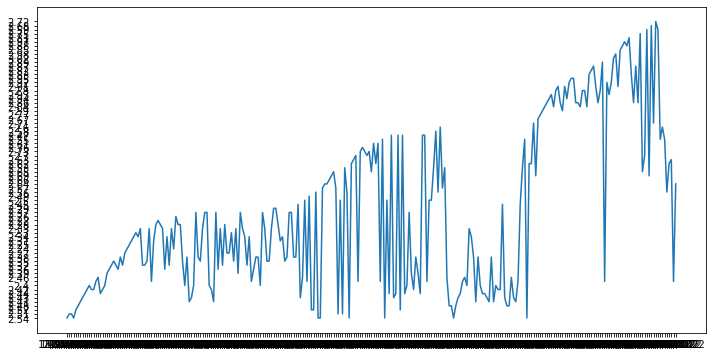

In [87]:
plt.figure(figsize=(12,6))
plt.plot(final['date'],final['T10YIE'])
plt.show()

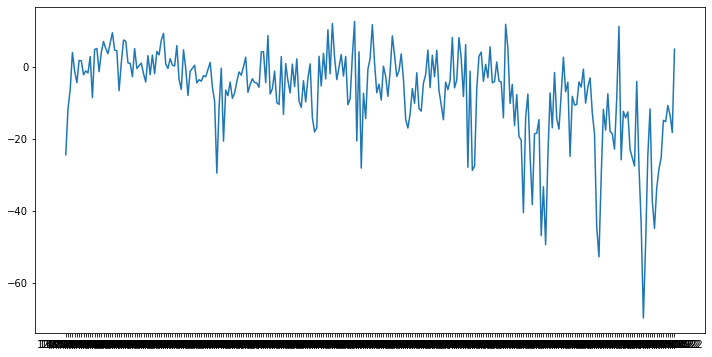

In [88]:
plt.figure(figsize=(12,6))
plt.plot(final['date'],final['sentiment_score'])
plt.show()

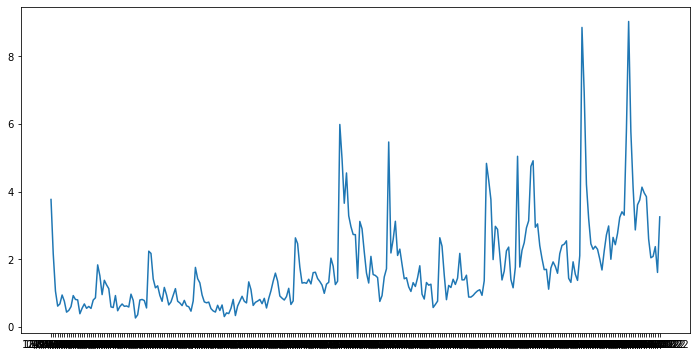

In [89]:
plt.figure(figsize=(12,6))
plt.plot(final['date'],final['attention_score'])
plt.show()